# LABORATORIO 2. 

## MUESTREO, CUANTIFICACIÓN SEÑALES ANALÓGAS Y DIGITALES.     

Julián Mauricio Sánchez Ceballos

cc: 1001132830

Ingenieria Electrónica

In [ ]:
# Setup de la practica

%%capture --no-display
%pip install numpy
%pip install matplotlib
%pip install scipy



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 162.5 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 195.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 231.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 975.2 kB/s eta 0:00:14
   ---------------------------------------- 0.1/12.9 MB 871.5 kB/s eta 0:00:15
   ---------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Muestreo 
1. Cargue la señal correspondiente al último número de su cédula. Con base en el número total de muestras y a la frecuencia de muestreo, grafique la señal en función del tiempo. 

2. Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de muestreo original. Escuche el audio, ¿Qué diferencia nota?¿A que se debe esto?.   

C:\Users\julia\AppData\Local\Temp\ipykernel_21644\4227504985.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read('0.wav')


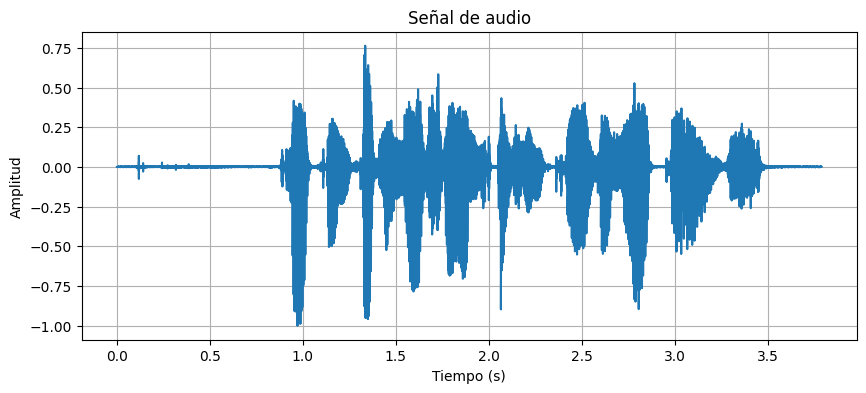

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar la señal de audio correspondiente al último número de tu cédula
# Reemplaza 'audio_file.wav' con el nombre del archivo de audio correspondiente
sample_rate, signal = wavfile.read('0.wav')

# Crear el eje de tiempo
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))


# Normalizar la señal
signal = signal.astype(np.float32)  # Convertimos a float para evitar errores
signal /= np.max(np.abs(signal))  # Escalar entre -1 y 1


# grafica la señal en funcion del tiempo
plt.figure(figsize=(10,4))
plt.plot(time, signal)
plt.title('Señal de audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()



In [56]:
from IPython.display import display, Audio

# Generar un nuevo archivo de audio con el doble de la frecuencia de muestreo
wavfile.write('audio_double_sample_rate.wav', sample_rate * 2, signal)

# Generar un nuevo archivo de audio con la mitad de la frecuencia de muestreo
wavfile.write('audio_half_sample_rate.wav', sample_rate // (2), signal)

display(Audio("audio_double_sample_rate.wav"))  # Reproductor para la señal con doble frecuencia de muestreo
display(Audio("audio_half_sample_rate.wav"))  # Reproductor para la señal con doble frecuencia de muestreo

El audio con el doble de frecuencia de muestreo suena prácticamente igual al original, ya que el contenido de la señal no cambia. Sin embargo, al incrementar la tasa de muestreo, es posible capturar con mayor precisión los detalles de las altas frecuencias, lo que puede hacer que ciertos matices, como armónicos o transitorios, sean más evidentes. Además, si el audio se reproduce sin ajustar la velocidad, su duración se reduce a la mitad, lo que genera un efecto de aceleración y un tono más agudo en la voz.

Por otro lado, al reducir la frecuencia de muestreo a la mitad, la señal pierde información en las frecuencias altas, lo que genera una percepción de sonido más opaco y con menor definición. Esto también puede provocar un cambio en el tono, haciendo que la voz suene más grave. Además, si la reproducción no se ajusta, la duración del audio se duplica, creando una sensación de ralentización, similar al efecto de reproducir un sonido a cámara lenta.

3. Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultante y la original, con sus respectivas frecuencias de muestreo. Grafique ambas señales en la misma figura ¿Qué puede concluir?

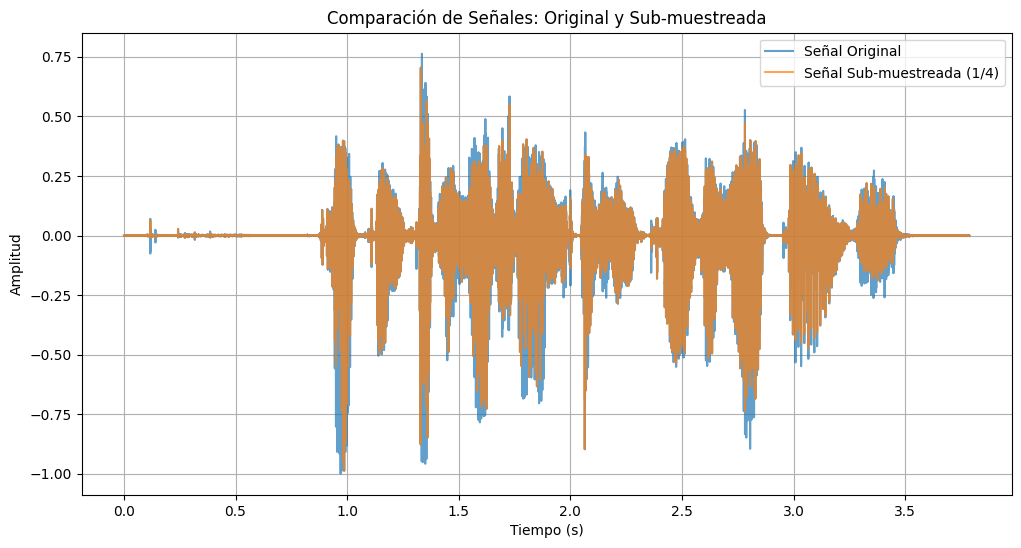

In [22]:
# Sub-muestrear la señal usando un cuarto de la frecuencia de muestreo original
subsampled_signal = signal[::4]
subsampled_sample_rate = sample_rate // 4

# Crear el eje de tiempo para la señal sub-muestreada
subsampled_time = np.linspace(0, len(subsampled_signal) / subsampled_sample_rate, num=len(subsampled_signal))

# Graficar ambas señales en la misma figura
plt.figure(figsize=(12, 6))

# Señal original
plt.plot(time, signal, label='Señal Original', alpha=0.7)

# Señal sub-muestreada
plt.plot(subsampled_time, subsampled_signal, label='Señal Sub-muestreada (1/4)', alpha=0.7)

plt.title('Comparación de Señales: Original y Sub-muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Guardar la señal sub-muestreada en un archivo de audio
wavfile.write('audio_quarter_sample_rate.wav', subsampled_sample_rate, subsampled_signal.astype(signal.dtype))

### Frecuencia de Nyquist y Aliasing

1. Genere una señal sinusoidal con una frecuencia de 4Hz y una frecencia de muestreo de 50Hz. Genere otra señal sinusoidal de frecuencia 4 Hz y muestréela según el teorema de Nyquist. Grafique las señales en la misma figura y mostrando los dos periodos de estas ¿Qué diferencias encuentra?

2. Escriba un código que genere dos señales sinusoidales muestreadas con una frecuencia $f_s = (n + 1) * 22 \ Hz. $   
La señal 1 tendrá una frecuencia $ f_1 = (n+1)$ Hz y la señal 2 tendrá una frecuencia $ f_2 = 2 \times f_s + (n+2) $ Hz.  
Tome $ n $ como el último dígito de su cédula.  

¿Ambas señales quedan bien representadas? ¿A qué se debe esto?


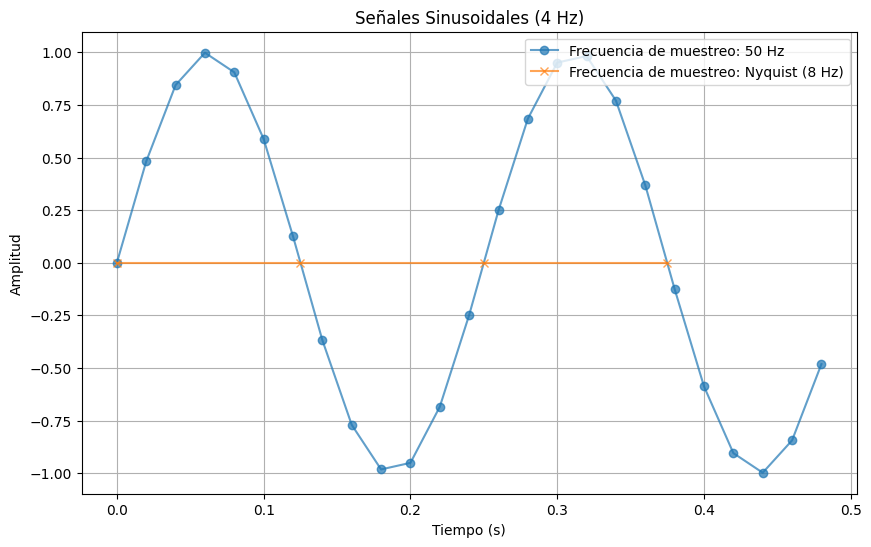

In [ ]:

f = 4  # Frecuencia de la señal (Hz)
fs1 = 50  # Frecuencia de muestreo (Hz)
fs2 = 2 * f  # Frecuencia de muestreo según el teorema de Nyquist (Hz)
t_period = 1 / f  # Periodo de la señal (s)
t = np.linspace(0, 2 * t_period, int(2 * t_period * fs1), endpoint=False)  # Tiempo para 2 periodos

# Señal con frecuencia de muestreo de 50 Hz
signal_fs1 = np.sin(2 * np.pi * f * t)

# Señal con frecuencia de muestreo según el teorema de Nyquist
t_nyquist = np.linspace(0, 2 * t_period, int(2 * t_period * fs2), endpoint=False)
signal_fs2 = np.sin(2 * np.pi * f * t_nyquist)

# Graficar las señales
plt.figure(figsize=(10, 6))
plt.plot(t, signal_fs1, label='Frecuencia de muestreo: 50 Hz', marker='o', alpha=0.7)
plt.plot(t_nyquist, signal_fs2, label='Frecuencia de muestreo: Nyquist (8 Hz)', marker='x', alpha=0.7)
plt.title('Señales Sinusoidales (4 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

Se puede notar como la señal con frecuencia de muestre de $50$ Hz muestra una representación similar a la onda sinusoidal, mientras que la señal con frecuencia de muestreo de Nyquist muestra una señal en 0, dado que que todas las muestras las esta tomando en el cruce por cero. 

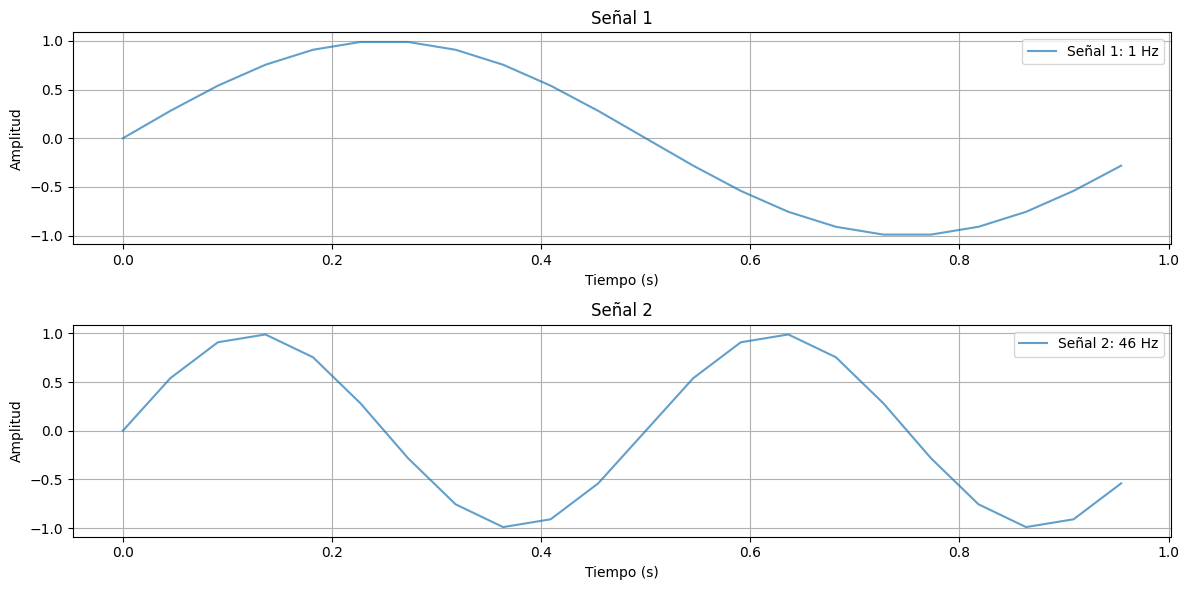

In [ ]:
# Parámetros
n = 0  # Último dígito de la cédula
fs = (n + 1) * 22  # Frecuencia de muestreo  22 Hz
f1 = (n + 1)  # Frecuencia de la señal 1     1 Hz
f2 = 2 * fs + (n + 2)  # Frecuencia de la señal 2 4(22) 46Hz

# Tiempo de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de duración

# Generar las señales
signal1 = np.sin(2 * np.pi * f1 * t)  # Señal 1
signal2 = np.sin(2 * np.pi * f2 * t)  # Señal 2

# Graficar las señales
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal1, label=f'Señal 1: {f1} Hz', alpha=0.7)
plt.title('Señal 1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, signal2, label=f'Señal 2: {f2} Hz', alpha=0.7)
plt.title('Señal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

La primera señal queda bien representada, pues se cumple el teorema de Nyquist, $f_{s} > 2f_{max}$ para un $n=0$ esta frecuencia se ve superada, lo que además significa que no toma los puntos de cruce por cero, que es lo que pasaria en una frecuencia exacta a $2F_{max}$. Por otro lado la segunda señal no está bien representada, debido a que para este caso y con $n=0$ la frecuencia de la señal supera la frecuencia de Nyquist, por lo que en una señal que deberia mostrar $46$ ciclos en $1$ segundo, apenas muestra $2$. Este fenomeno es conocido como ALiasing. 

### Cuantificación
1. Use la función mostrada a continuación para re-cuantificar la señal de audio utilizada en los numerales anteriores a 2, 4, 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gráficamente cada una de las señales obtenidas con la señal original. ¿Qué pudo notar?

C:\Users\julia\AppData\Local\Temp\ipykernel_21644\1298745637.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read('0.wav')


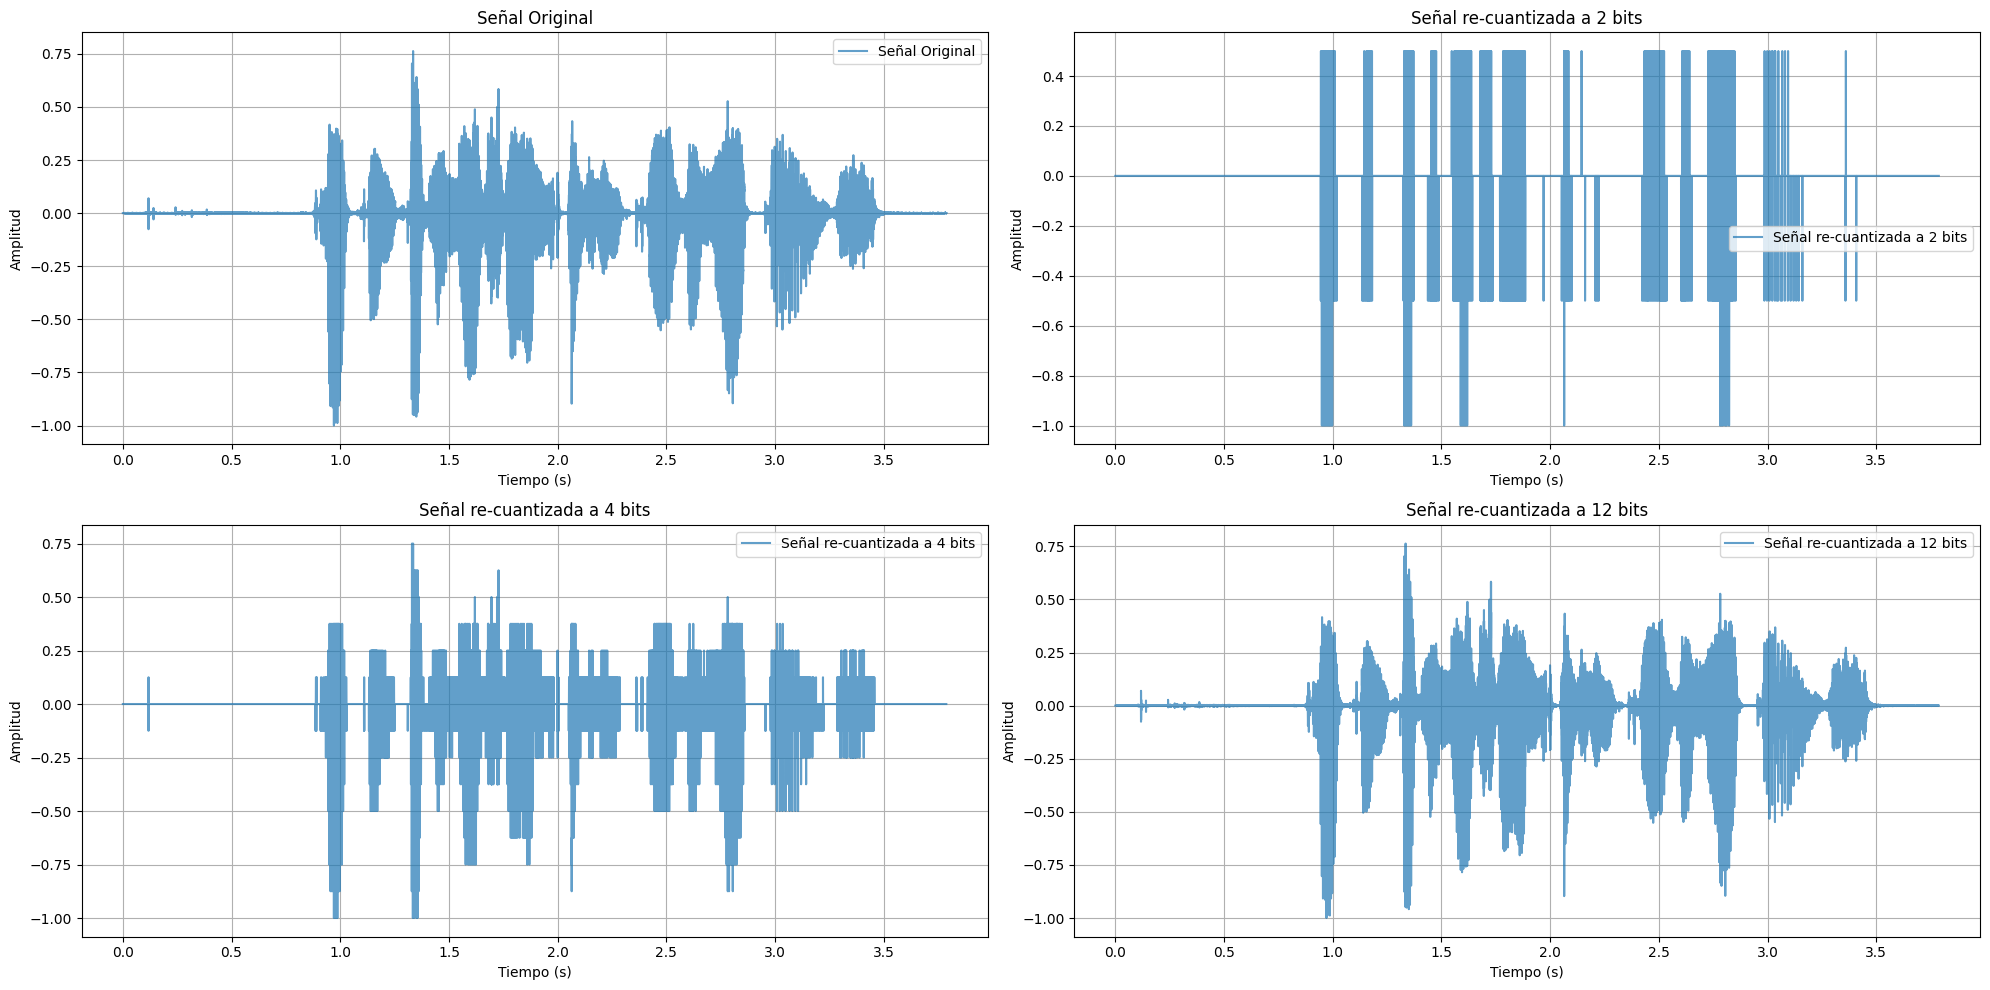

In [ ]:
def fxquant(s,bit):
    # s: senal de entrada, debe estar normalizada entre-1 y 1
    # bit: bits de cuantizacion
    Plus1=np.power(2, (bit-1))
    X=s*Plus1
    X=np.round(X)
    X=np.minimum(Plus1-1.0,X)
    X=np.maximum(-1.0*Plus1,X)
    X=X/Plus1
    return X


sample_rate, signal = wavfile.read('0.wav')

# Normalización de la señal
# Normalizar la señal
signal = signal.astype(np.float32)  # Convertimos a float para evitar errores
signal /= np.max(np.abs(signal))  # Escalar entre -1 y 1

time = np.linspace(0, len(signal) / sample_rate, num=len(signal))

# Re cuantificación de las señales
re_qua2 = fxquant(signal, 2)
re_qua4 = fxquant(signal, 4)
re_qua12 = fxquant(signal, 12)

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(time, signal, label=f'Señal Original', alpha=0.7)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(time, re_qua2, label=f'Señal re-cuantizada a 2 bits', alpha=0.7)
plt.title('Señal re-cuantizada a 2 bits')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(time, re_qua4, label=f'Señal re-cuantizada a 4 bits', alpha=0.7)
plt.title('Señal re-cuantizada a 4 bits')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(time, re_qua12, label=f'Señal re-cuantizada a 12 bits', alpha=0.7)
plt.title('Señal re-cuantizada a 12 bits')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()



plt.tight_layout()
plt.show()



Se puede notar que a medida de que se cuantiza con mas bits, la señal es más similar a la señal origial.  

### Transmisición analógica vs Digital
1. Cargue una señal de audio correspondiente al ultimo número de su cedula.

2. Para obtener la señal analógica, normalice el audio en amplitud y luego re-escale en un factor de 460. Use el siguiente código como ayuda.

C:\Users\julia\AppData\Local\Temp\ipykernel_21644\2302745367.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read('0.wav')


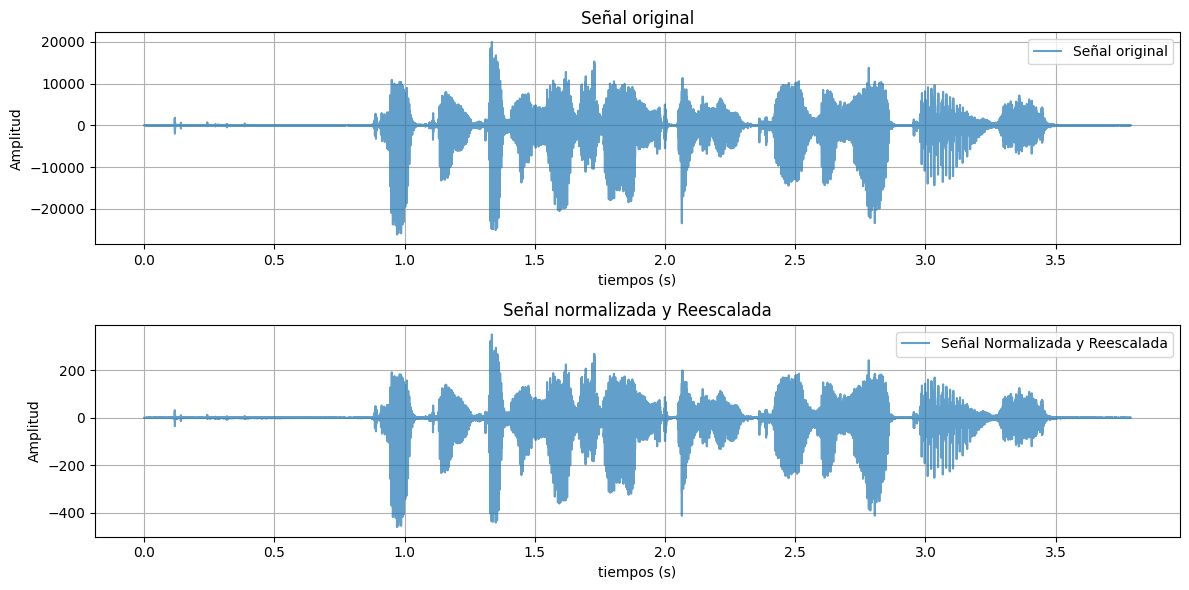

In [42]:
#Re escalar la señal
# Cargar la señal de audio
sample_rate, signal = wavfile.read('0.wav')

# Normalizar la señal en amplitud
norm = 1.0 / np.max(np.abs(signal))
sA = 460.0 * signal * norm  # Señal reescalada

# eje del tiempo
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))


#graficar la señal original y normalizada
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(time, signal, label='Señal original', alpha=0.7)
plt.title('Señal original')
plt.xlabel('tiempos (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(time, sA, label='Señal Normalizada y Reescalada', alpha=0.7)
plt.title('Señal normalizada y Reescalada')
plt.xlabel('tiempos (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



3. La señal digital se obtiene aproximando cada punto de la señal analógica a un valor discreto que generalmente es un entero. Use la función round() de la librería numpy para aproximar la señal analógica y obtener la señal digital.
 
4. Para ver las diferencias entre la señal analógica y digital grafique, en una misma figura (subplot), 100 muestras intermedias de cada señal. ¿Se puede observar alguna diferencia entre las señales?

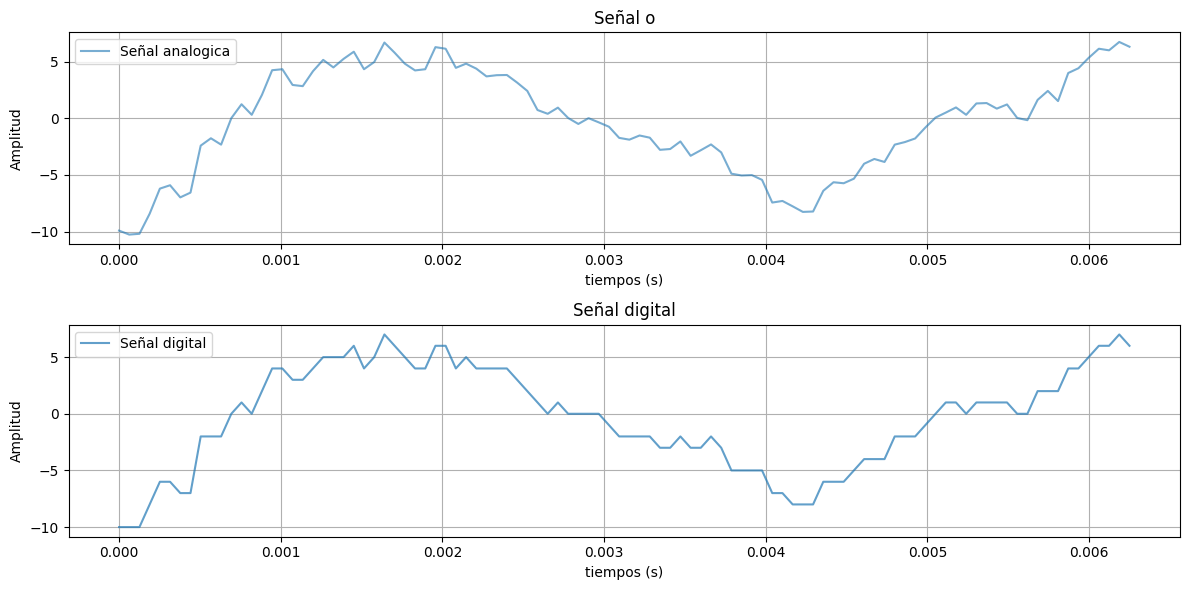

In [43]:
# señal digital 

signal_dig = np.round(sA)

# muestras intermedias
start = len(sA) // 3
end = start + 100
time = np.linspace(0, 100/sample_rate, num = 100)


plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(time, sA[start:end], label='Señal analogica', alpha=0.6)
plt.title('Señal o')
plt.xlabel('tiempos (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(time, signal_dig[start:end], label='Señal digital', alpha=0.7)
plt.title('Señal digital')
plt.xlabel('tiempos (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Transmisión

1. Use la función llamada _repeater(...)_ que recibe como entrada la señal a transmitir, la amplitud del ruido que se desea agregar y la constante de atenuación. Esta función retorna la señal afectada por el ruido, atenuada, y amplificada nuevamente.



In [44]:
def repeater(x, noise_amplitude, attenuation):
    x=x*attenuation
    Noise=np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    x=x+Noise
    x=x/attenuation
    return x

2. La transmisión analógica no es más que una secuencia de repetidores, la cual puede ser implementada con la siguiente función.


In [45]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

3. En el caso de la señal digital, comúnmente se vuelve a cuantificar la señal después de cada repetidor, ya que sabemos que en este caso solo tenemos valores enteros. Esto es implementado a partir de la siguiente función.


In [46]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

4. Compare los esquemas de transmisión de las señales. Para ello, defina el número de repetidores en 150, la amplitud del ruido en 0.15 y la constante de atenuación en 0.35. Luego, realice la transmisión de la señal analógica y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido (SNR) tanto para la señal analógica como digital. ¿Qué diferencia encuentra entre las señales?  

Use la siguiente función para calcular la SNR:


In [47]:
def SNR(noisy, original):
    # power of the error
    err = np.var(original-noisy)
    # power of the signal
    sig = np.var(original)
    # SNR in dBs
    return 10 * np.log10(sig/err)

5. Manteniendo constantes la amplitud de ruido y la atenuación, realice un barrido del número de repetidores entre 10 y 100 (no lo haga de 1 en 1). Para cada iteración, realice la transmisión analógica y digital y calcule la SNR para cada una.  

Al final, grafique la SNR en función del número de repetidores. ¿Qué diferencia encuentra entre las gráficas obtenidas?


SNR Analógica: -12.66 dB
SNR Digital: 6.31 dB


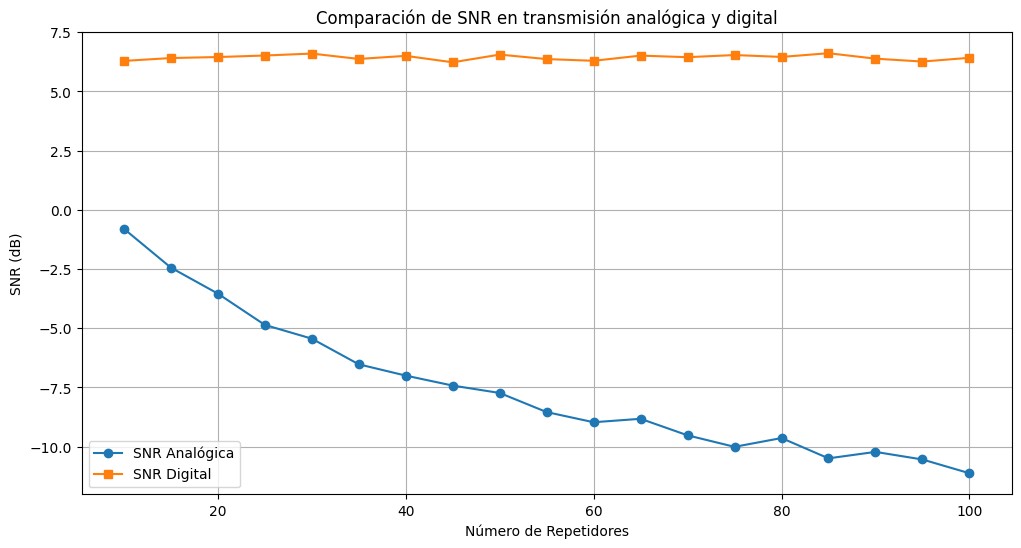

In [54]:
# Parámetros de simulación
num_repeaters = 150         # numero de repetidores
noise_amplitude = 0.15      # Amplitud del ruido en cada repetidor
attenuation = 0.35          # Atenuacion de cada repetidor


t = np.linspace(0, 1, 1000)  # Tiempo
original_signal = np.sin(2 * np.pi * 5 * t)  # Señal senoidal original

# Transmisión analógica y digital
analog_signal = analog_tx(original_signal, num_repeaters, noise_amplitude, attenuation)
digital_signal = digital_tx(original_signal, num_repeaters, noise_amplitude, attenuation)

# Cálculo de SNR
snr_analog = SNR(analog_signal, original_signal)
snr_digital = SNR(digital_signal, original_signal)

print(f"SNR Analógica: {snr_analog:.2f} dB")
print(f"SNR Digital: {snr_digital:.2f} dB")


salto = 5           # Cada 5 repetidores

#recorrido de los repetidores
repeaters_range = np.arange(10, 101, salto)         
snr_analog_list = []
snr_digital_list = []

for num in repeaters_range:
    analog_signal = analog_tx(original_signal, num, noise_amplitude, attenuation)
    digital_signal = digital_tx(original_signal, num, noise_amplitude, attenuation)
    snr_analog_list.append(SNR(analog_signal, original_signal))
    snr_digital_list.append(SNR(digital_signal, original_signal))

# Gráfica de SNR en función del número de repetidores
plt.figure(figsize=(12, 6))
plt.plot(repeaters_range, snr_analog_list, label="SNR Analógica", marker="o")
plt.plot(repeaters_range, snr_digital_list, label="SNR Digital", marker="s")
plt.xlabel("Número de Repetidores")
plt.ylabel("SNR (dB)")
plt.title("Comparación de SNR en transmisión analógica y digital")
plt.legend()
plt.grid()
plt.show()

La diferencia en es el comportamiento de la SNR a medida de que pasa por los repetidores, mientras que en la señal la SNR se mantiene constante, o no se ve muy perturbada (a pesar de que el valor inicial ya es bajo) la señal analogica llega completamente destrozada al final de la transmisión, esto se da por varios motivos:
- los repetidores le inyectan una ganancia, pero esta ganacia no afecta solo a la señal si no al ruido del canal.
- Dado que en cada etapa de recuperación de la señal (repetidor) se recuantifica la señal digital permite mantener el SNR estable al no acumular el error que genera el ruido del canal 



# conclusiones




* Los procesos de cuantificación y muestreo son fundamentales para la conversión efectiva de una señal continua en una representación discreta. Durante el laboratorio se observó que un muestreo inadecuado puede provocar distorsiones significativas, como aliasing y pérdida de información relevante, lo que compromete la fidelidad de la señal reconstruida. Asimismo, una cuantificación con baja resolución introduce errores de redondeo y ruido de cuantización, afectando la precisión de la señal digitalizada. Estos fenómenos subrayan la importancia de aplicar correctamente el teorema de Nyquist para evitar el aliasing y de seleccionar una resolución de cuantificación acorde a los requisitos del sistema, considerando tanto el ancho de banda disponible como las limitaciones de procesamiento.  

* El comportamiento inestable del SNR en la transmisión analógica permite concluir que, además de ser costosa en términos energéticos y computacionales, sufre una degradación progresiva en entornos ruidosos debido a la acumulación de interferencias y atenuaciones. En contraste, la transmisión digital demostró una mayor resistencia al ruido del canal, a la distorsión generada por los repetidores y a la atenuación del sistema. Esto se debe a que en la transmisión digital la señal es regenerada y re-cuantificada en cada repetidor, eliminando errores acumulativos. En cambio, en la transmisión analógica, cada repetidor amplifica no solo la señal, sino también el ruido y las distorsiones previas, lo que degrada aún más la relación señal a ruido (SNR).  

* Los resultados obtenidos destacan las ventajas de los sistemas digitales en términos de robustez y fiabilidad en condiciones adversas, lo que explica su predominio en la mayoría de las aplicaciones modernas de telecomunicaciones. Sin embargo, estos beneficios dependen de un muestreo y una cuantificación adecuados, ya que una mala parametrización puede degradar la calidad de la señal digital hasta el punto de hacerla comparable o incluso inferior a una transmisión analógica. Además, la conversión digital introduce una mayor complejidad en términos de procesamiento y ancho de banda requerido, lo que impone restricciones adicionales en el diseño de sistemas de transmisión.